# Power Plant Data Analysis

In [1]:
import ee

In [2]:
import geemap

In [3]:
ee.Initialize()

## Create Map object

In [4]:
Map = geemap.Map(center=[40,-100],zoom=5)
# If this is your first time running the code then you will be prompted to authenticate with Google Cloud 

In [5]:
Map.add_basemap("FWS NWI Wetlands")

### Importing Data

In [6]:
data = ee.FeatureCollection("WRI/GPPD/power_plants");

### Filtering for U.S data only

In [7]:
usa_data = data.filter(ee.Filter.eq('country', 'USA'));

### Create Energy Source 

In [8]:
# energy_source = data.filter(ee.Filter.eq('

### Displaying Map

In [9]:
Map.addLayer(usa_data, {}, 'USA Power Plants')
Map.centerObject(usa_data, 4);
Map

Map(center=[40.513365808232265, -94.763554882789], controls=(WidgetControl(options=['position', 'transparent_b…

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

<function matplotlib.pyplot.show(close=None, block=None)>

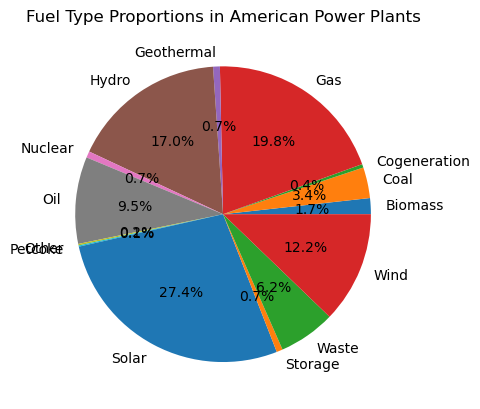

In [3]:
#Generate a pie chart showing proportions of primary fuel types.  
data = pd.read_csv('usa_clean.csv')

count = data['primary_fuel'].value_counts()

total_power = data['generation_gwh_2017'].sum()
proportions = count / total_power

labels = ['Biomass', 'Coal', 'Cogeneration', 'Gas', 'Geothermal', 'Hydro', 'Nuclear', 'Oil', 'Other', 'Petcoke', 'Solar', 'Storage', 'Waste', 'Wind'] 
values = []
for label in labels:
    if label in proportions:
        values.append(proportions[label])
    else:
        values.append(0)

plt.pie(values, labels = labels, autopct = '%1.1f%%')

plt.title("Fuel Type Proportions in American Power Plants")

plt.show